# Dependencias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
x = np.linspace(-5,5, num=N)

## Función lineal
$$y=mx+b$$

Sirve para mantener valores a lo largo de un proceso (predecir).

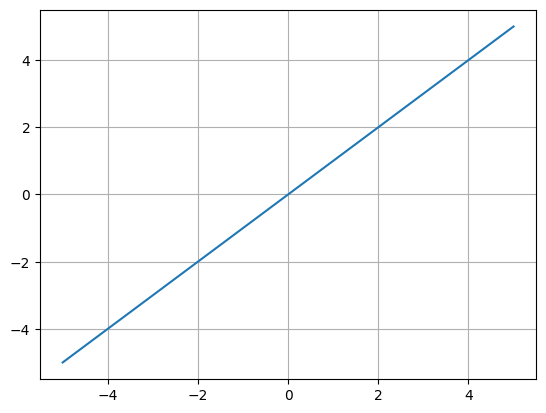

In [2]:
def f(x):
  return x

plt.plot(x, f(x))
plt.grid()

## Función escalón o de Heaviside
$$H(x) = 
     \begin{cases}
        0, &\quad \text{para, } x < 0 \\
        1,  &\quad\text{para. } x \ge 0 \\
     \end{cases}
$$

Clasificacion categorica, valores binarios.

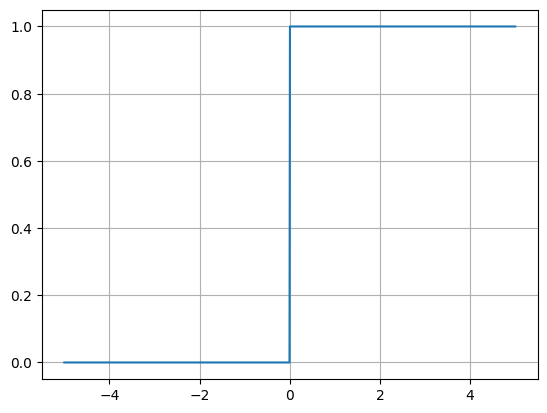

In [3]:
def H(x):
  Y = np.zeros(len(x))
  for idx,x in enumerate(x):
    if x>=0:
      Y[idx]=1
  return Y
    

N=1000


y = H(x)

plt.plot(x,y)
plt.grid()

## Función sigmoide

$$f(x)=\frac{1}{1-e^{-x}}$$

Regresion logistica

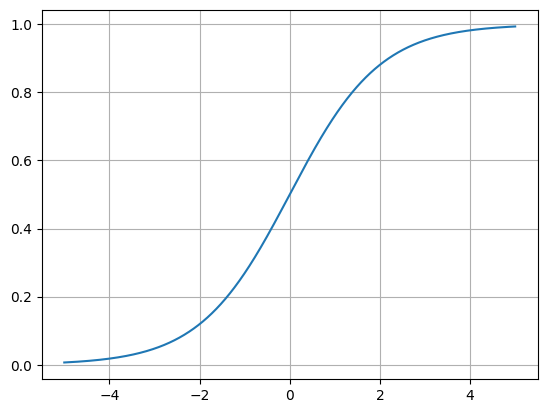

In [4]:
def f(x):
  return 1/(1 + np.exp(-x))
    

N=1000

y = f(x)

plt.plot(x,y)
plt.grid()

## Función tangente hiperbólica

$$f(x)=\frac{2}{1+e^{-2x}}-1$$

Funcion de escalamiento

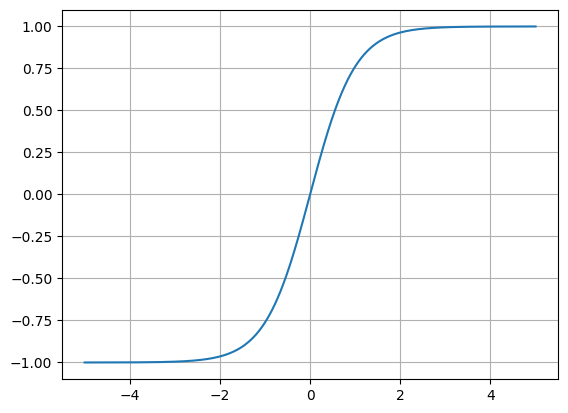

In [5]:
def f(x):
  return np.tanh(x)
    

N=1000

y = f(x)

plt.plot(x,y)
plt.grid()

## Función ReLU

$$R(x)=max(0,x)$$

Si un valor es mayor a cero --- > y = x
Simulación de “neuronas muertas”

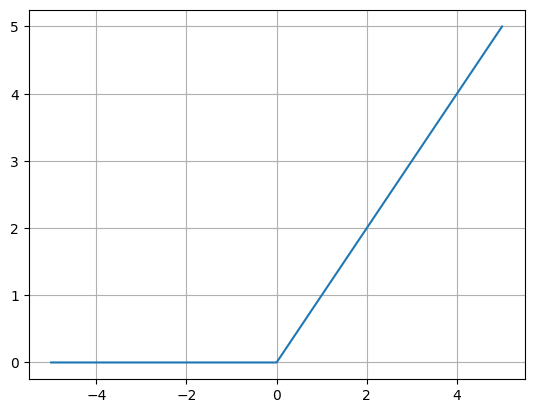

In [6]:
def f(x):
  return np.maximum(x,0)
    

N=1000

y = f(x)

plt.plot(x,y)
plt.grid()